In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-surfaces-evolution-in-romania-19902019/forest_surfaces_romania_en_1990_2019.csv


## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

In [3]:
df=pd.read_csv('/kaggle/input/forest-surfaces-evolution-in-romania-19902019/forest_surfaces_romania_en_1990_2019.csv')

In [4]:
df.head()

,Category,Region,Year,Unit,Value
0,Total,TOTAL,1990,Thousands hectares,6371.0
1,Total,TOTAL,1991,Thousands hectares,6367.6
2,Total,TOTAL,1992,Thousands hectares,6368.2
3,Total,TOTAL,1993,Thousands hectares,6366.9
4,Total,TOTAL,1994,Thousands hectares,6369.0


## Data Exploration

In [8]:
df.shape

(8111, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  8111 non-null   object 
 1   Region    8111 non-null   object 
 2   Year      8111 non-null   int64  
 3   Unit      8111 non-null   object 
 4   Value     8111 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 317.0+ KB


In [7]:
df.describe

<bound method NDFrame.describe of      Category Region  Year                 Unit   Value
0       Total  TOTAL  1990   Thousands hectares  6371.0
1       Total  TOTAL  1991   Thousands hectares  6367.6
2       Total  TOTAL  1992   Thousands hectares  6368.2
3       Total  TOTAL  1993   Thousands hectares  6366.9
4       Total  TOTAL  1994   Thousands hectares  6369.0
...       ...    ...   ...                  ...     ...
8106   Others  Timis  2015   Thousands hectares     1.9
8107   Others  Timis  2016   Thousands hectares     1.9
8108   Others  Timis  2017   Thousands hectares     1.9
8109   Others  Timis  2018   Thousands hectares     1.9
8110   Others  Timis  2019   Thousands hectares     2.0

[8111 rows x 5 columns]>

In [5]:
df['Category'].unique()

array(['Total', 'Wood', 'Softwood', 'Hardwood', 'Others'], dtype=object)

In [9]:
df['Region'].unique()

array(['TOTAL', 'MACROREGIUNEA UNU', 'Regiunea NORD-VEST', 'Bihor',
       'Bistrita-Nasaud', 'Cluj', 'Maramures', 'Satu Mare', 'Salaj',
       'Regiunea CENTRU', 'Alba', 'Brasov', 'Covasna', 'Harghita',
       'Mures', 'Sibiu', 'MACROREGIUNEA DOI', 'Regiunea NORD-EST',
       'Bacau', 'Botosani', 'Iasi', 'Neamt', 'Suceava', 'Vaslui',
       'Regiunea SUD-EST', 'Braila', 'Buzau', 'Constanta', 'Galati',
       'Tulcea', 'Vrancea', 'MACROREGIUNEA TREI', 'Regiunea SUD-MUNTENIA',
       'Arges', 'Calarasi', 'Dambovita', 'Giurgiu', 'Ialomita', 'Prahova',
       'Teleorman', 'Regiunea BUCURESTI - ILFOV', 'Ilfov', 'Bucuresti',
       'MACROREGIUNEA PATRU', 'Regiunea SUD-VEST OLTENIA', 'Dolj', 'Gorj',
       'Mehedinti', 'Olt', 'Valcea', 'Regiunea VEST', 'Arad',
       'Caras-Severin', 'Hunedoara', 'Timis'], dtype=object)

In [12]:
df['Year'].value_counts()

2015    273
2019    272
2013    272
2017    272
2016    272
2018    272
2014    272
2001    272
2006    271
2009    271
2002    271
2010    271
2012    271
2008    271
2004    271
2003    271
2007    271
2005    271
2011    270
1997    269
1990    269
1998    269
1991    269
1999    269
1992    269
1994    268
1993    268
1995    268
2000    268
1996    268
Name: Year, dtype: int64

## Data Visualization

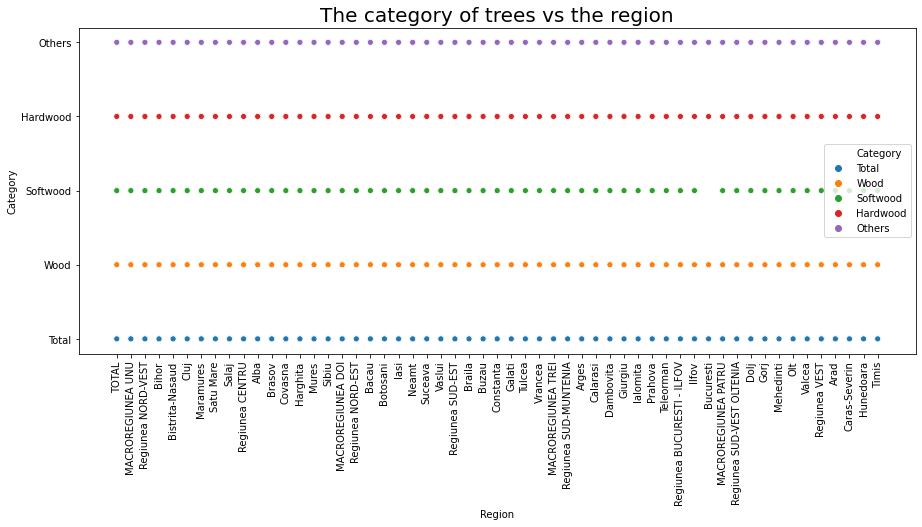

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'Region' ,y='Category', hue='Category', data=df)
plt.xticks(rotation = 90)
plt.title('The category of trees vs the region', fontsize = 20)
plt.show()

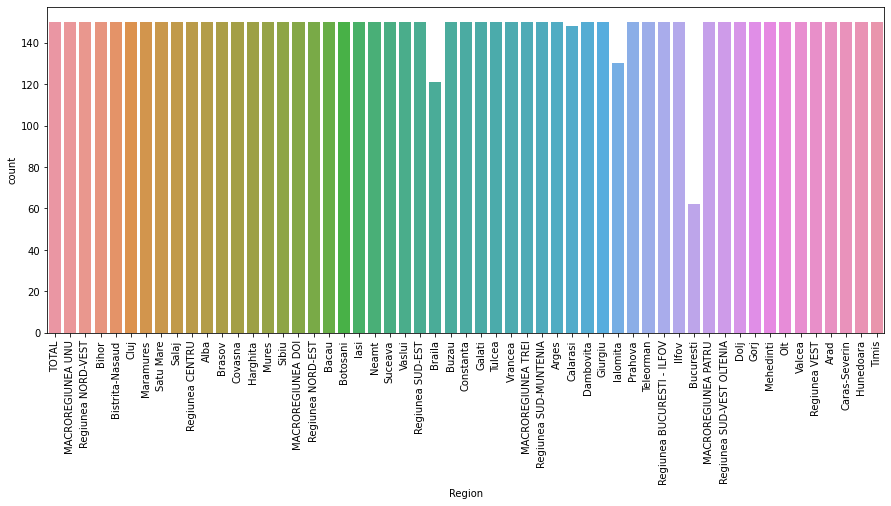

In [24]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Region', data = df)
plt.xticks(rotation = 90)
plt.show()

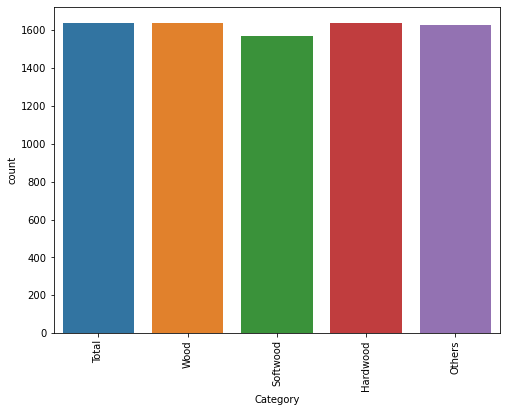

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Category', data = df)
plt.xticks(rotation = 90)
plt.show()

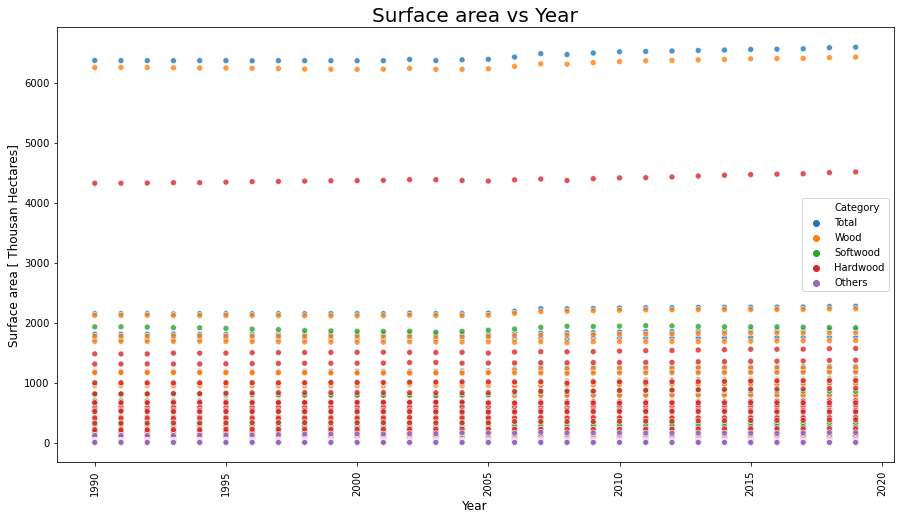

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Year' ,y='Value', hue='Category', data=df, alpha = 0.8 )
plt.xticks(rotation = 90)
plt.title('Surface area vs Year', fontsize = 20)
plt.ylabel('Surface area [ Thousan Hectares]', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.show()

In [27]:
county_list = ['Bihor', 'Bistrita-Nasaud', 'Cluj', 'Maramures', 'Satu Mare', 'Salaj', 'Alba', 'Brasov', 'Covasna', 'Harghita', 'Mures', 'Sibiu', 
               'Bacau', 'Botosani', 'Iasi', 'Neamt', 'Suceava', 'Vaslui', 'Braila', 'Buzau', 'Constanta', 'Galati', 'Tulcea', 'Vrancea', 
               'Arges', 'Calarasi', 'Dambovita', 'Giurgiu', 'Ialomita', 'Prahova', 'Teleorman', 'Ilfov', 'Bucuresti', 
               'Dolj', 'Gorj', 'Mehedinti', 'Olt', 'Valcea', 'Arad', 'Caras-Severin', 'Hunedoara', 'Timis']
data_county_df = df.loc[df.Region.isin(county_list)]

In [28]:
selection_df = data_county_df.loc[data_county_df.Category=="Total"]
min_value = selection_df.Value.min()
max_value = selection_df.Value.max()
import plotly.express as px
fig = px.bar(selection_df, x="Value", y="Region", animation_frame='Year', orientation='h',
             range_color =[min_value,max_value],
             width=600, height=800, range_x = [min_value,max_value],
            title='Surface evolution/county 1990-2019 - Total')
fig.update_layout(font=dict(family="Courier New, monospace",size=10,color="#7f7f7f"))
fig.show()

In [32]:
selection_df = data_county_df.loc[data_county_df.Category=="Hardwood"]
min_value = selection_df.Value.min()
max_value = selection_df.Value.max()
import plotly.express as px
fig = px.bar(selection_df, x="Value", y="Region", animation_frame='Year', orientation='h',
             range_color =[min_value,max_value],
             width=600, height=800, range_x = [min_value,max_value],
            title='Surface evolution/county 1990-2019 - Hardwood')
fig.update_layout(font=dict(family="Courier New, monospace",size=10,color="#7f7f7f"))
fig.show()

In [44]:
selection_df = data_county_df.loc[data_county_df.Category=="Softwood"]
min_value = selection_df.Value.min()
max_value = selection_df.Value.max()
import plotly.express as px
fig = px.bar(selection_df, x="Value", y="Region", animation_frame='Year', orientation='h',
             range_color =[min_value,max_value],
             width=600, height=800, range_x = [min_value,max_value],
            title='Surface evolution/county 1990-2019 - Softwood')
fig.update_layout(font=dict(family="Courier New, monospace",size=10,color="#7f7f7f"))
fig.show()

In [46]:
selection_df = data_county_df.loc[data_county_df.Category=="Others"]
min_value = selection_df.Value.min()
max_value = selection_df.Value.max()
import plotly.express as px
fig = px.bar(selection_df, x="Value", y="Region", animation_frame='Year', orientation='h',
             range_color =[min_value,max_value],
             width=600, height=800, range_x = [min_value,max_value],
            title='Surface evolution/county 1990-2019 - Others')
fig.update_layout(font=dict(family="Courier New, monospace",size=10,color="#7f7f7f"))
fig.show()

# Prediction models

In [48]:
df.head()

,Category,Region,Year,Unit,Value
0,Total,TOTAL,1990,Thousands hectares,6371.0
1,Total,TOTAL,1991,Thousands hectares,6367.6
2,Total,TOTAL,1992,Thousands hectares,6368.2
3,Total,TOTAL,1993,Thousands hectares,6366.9
4,Total,TOTAL,1994,Thousands hectares,6369.0


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [52]:
category_enc = le.fit_transform(df['Category'])
region_enc = le.fit_transform(df['Region'])
print(category_enc)
print(region_enc)

[3 3 3 ... 1 1 1]
[48 48 48 ... 50 50 50]


In [53]:
features = list(zip(category_enc,region_enc, df['Year']))

In [66]:
X = features
y = df['Value']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 32, test_size = 0.3) 

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.05628359110401637

In [74]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 32)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.9999856867516426

99% accuracy is indeed a very good result.

In [76]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 32)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.9999824541268064